# Setup
## Imports

In [21]:
import os

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

## Load dataset

In [2]:
# Where is the data?
data_path = "data"

metadata_filename = "HAM10000_metadata.csv"
preprocesed_image_filenames = "hmnist_{resolution}_{resolution}_{depth}.csv"

In [3]:
# What data to load. change this for a different dataset
image_resolution = 28
color = True

depth = "RGB" if color else "L"
preprocesed_image_filename = preprocesed_image_filenames.format(resolution=image_resolution,depth=depth)

In [4]:
# Load data into dataframes
meta_df = pd.read_csv(data_path + os.sep + metadata_filename)
image_df = pd.read_csv(data_path + os.sep + preprocesed_image_filename)


# Initial visualization

In [5]:
meta_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [6]:
image_df

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


# Clean data

In [7]:
# Remove ID labels, they do not contain interpretable information
meta_df = meta_df.drop(["lesion_id","image_id"], axis=1)

# Reorder meta_df columns
cols = meta_df.columns.tolist()

cols[0], cols[-1] = cols[-1], cols[0]
cols[1], cols[-2] = cols[-2], cols[1]

meta_df = meta_df[cols]
meta_df

,localization,sex,age,dx_type,dx
0,scalp,male,80.0,histo,bkl
1,scalp,male,80.0,histo,bkl
2,scalp,male,80.0,histo,bkl
3,scalp,male,80.0,histo,bkl
4,ear,male,75.0,histo,bkl
...,...,...,...,...,...
10010,abdomen,male,40.0,histo,akiec
10011,abdomen,male,40.0,histo,akiec
10012,abdomen,male,40.0,histo,akiec
10013,face,male,80.0,histo,akiec


In [8]:
# Remove "label" from image df, this information is already in meta_df
image_df = image_df.drop(["label"], axis=1)
image_df

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,181,208,185,187,208,186,186,206,187,189
10011,2,3,1,38,33,32,121,104,103,132,...,129,96,79,76,24,23,21,3,4,1
10012,132,118,118,167,149,149,175,156,160,184,...,190,204,181,178,181,159,153,172,151,145
10013,160,124,146,164,131,152,167,127,146,169,...,165,185,162,167,184,157,166,185,162,172


# Visualize data once more (in more depth)
## Statistics

In [9]:
meta_df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [10]:
meta_df[meta_df.columns.drop("age")].describe()

,localization,sex,dx_type,dx
count,10015,10015,10015,10015
unique,15,3,4,7
top,back,male,histo,nv
freq,2192,5406,5340,6705


In [11]:
image_df.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
count,10015.000000,10015.000000,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,...,10015.000000,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,181.056415,131.728407,141.24024,187.274488,137.089466,147.206191,192.358862,141.796405,152.211782,196.177234,...,148.545781,184.68657,138.416875,144.061508,178.656216,133.217474,138.752172,172.307239,127.871193,133.144483
std,59.746698,45.043473,48.67267,54.021274,41.138096,44.661091,48.267713,37.382709,40.725174,43.892249,...,37.018206,47.02376,38.393007,41.322365,53.534096,42.910723,45.642257,58.533979,46.453818,49.060028
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.000000,117.000000,123.00000,165.000000,122.000000,130.000000,170.000000,127.000000,135.000000,174.000000,...,129.000000,166.00000,123.000000,126.000000,160.000000,118.000000,120.000000,153.000000,113.000000,115.000000
50%,198.000000,141.000000,151.00000,201.000000,144.000000,155.000000,204.000000,146.000000,157.000000,205.000000,...,151.000000,197.00000,144.000000,149.000000,195.000000,141.000000,146.000000,191.000000,138.000000,142.000000
75%,224.000000,159.000000,172.00000,226.000000,162.000000,174.000000,227.000000,163.000000,177.000000,228.000000,...,171.000000,216.00000,161.000000,169.000000,214.000000,159.000000,166.000000,212.000000,156.000000,163.000000
max,255.000000,246.000000,255.00000,254.000000,246.000000,254.000000,255.000000,251.000000,255.000000,255.000000,...,254.000000,255.00000,254.000000,254.000000,254.000000,252.000000,255.000000,254.000000,249.000000,254.000000


## Plots
### Meta

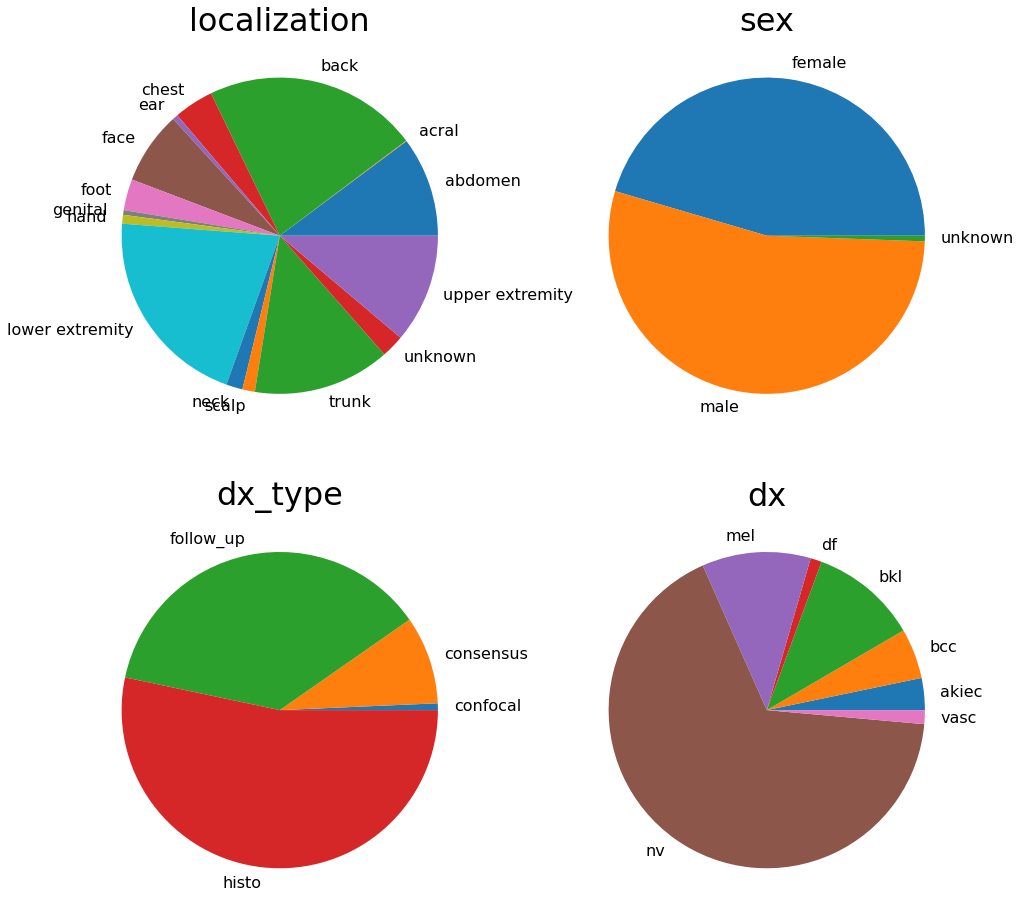

In [30]:
plot_size = 16
textprops = dict(fontsize=plot_size)

categorical_columns =  meta_df.columns.drop("age")

n_pies = len(categorical_columns)
cols = n_pies//2
rows = min(n_pies//2, n_pies//2 + 1, key=lambda x: abs(x - n_pies/2))

fig, axs = plt.subplots(cols,rows)

for i, cc in enumerate(categorical_columns):
    ax = axs[i//2,i%2]
    
    c = meta_df.groupby(cc).size()
    counts = c
    labels = c.keys()
    
    ax.pie(counts,labels=labels,textprops=textprops)
    ax.set_title(cc,fontsize=plot_size*2)
    
fig.set_size_inches(plot_size,plot_size)
plt.show()

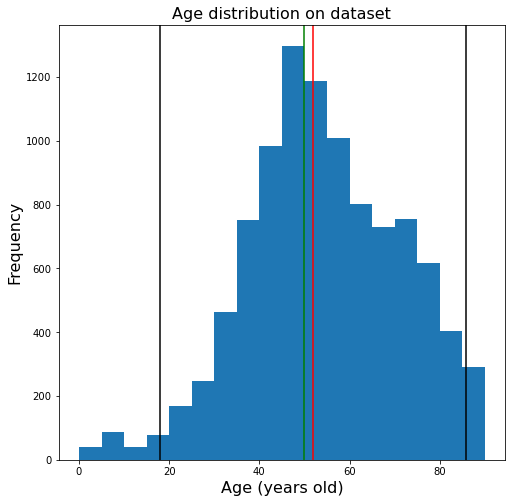

In [45]:
plot_size = 8
std_span = 2 # >75 % data (Chebyshev’s Theorem), > 95% on normal distributions

fig, ax = plt.subplots()

ax.hist(meta_df.age, bins=np.arange(0,95,5))

ax.set_title("Age distribution on dataset",fontsize=plot_size*2)
ax.set_xlabel("Age (years old)",fontsize=plot_size*2)
ax.set_ylabel("Frequency",fontsize=plot_size*2)

ax.axvline(meta_df.age.mean(), color="red") # Mean line
ax.axvline(meta_df.age.median(), color="green") # Median line

ax.axvline(meta_df.age.mean()- meta_df.age.std()*std_span, color="black") # Std lines
ax.axvline(meta_df.age.mean() + meta_df.age.std()*std_span, color="black") 


fig.set_size_inches(plot_size,plot_size)

### Image

In [48]:
img_cols = image_df.columns.tolist()

color_cols = {}
color_cols["Red"] = img_cols[::3]
color_cols["Green"] = img_cols[1::3]
color_cols["Blue"] = img_cols[2::3]

color_dfs = {k : image_df[v] for k,v in color_cols.items()}

In [69]:
## Define metrics
metrics = {}
metrics["mean"] = pd.DataFrame.mean
metrics["median"] = pd.DataFrame.median
metrics["std"] = pd.DataFrame.std
metrics["max"] = pd.DataFrame.max
metrics["min"] = pd.DataFrame.min


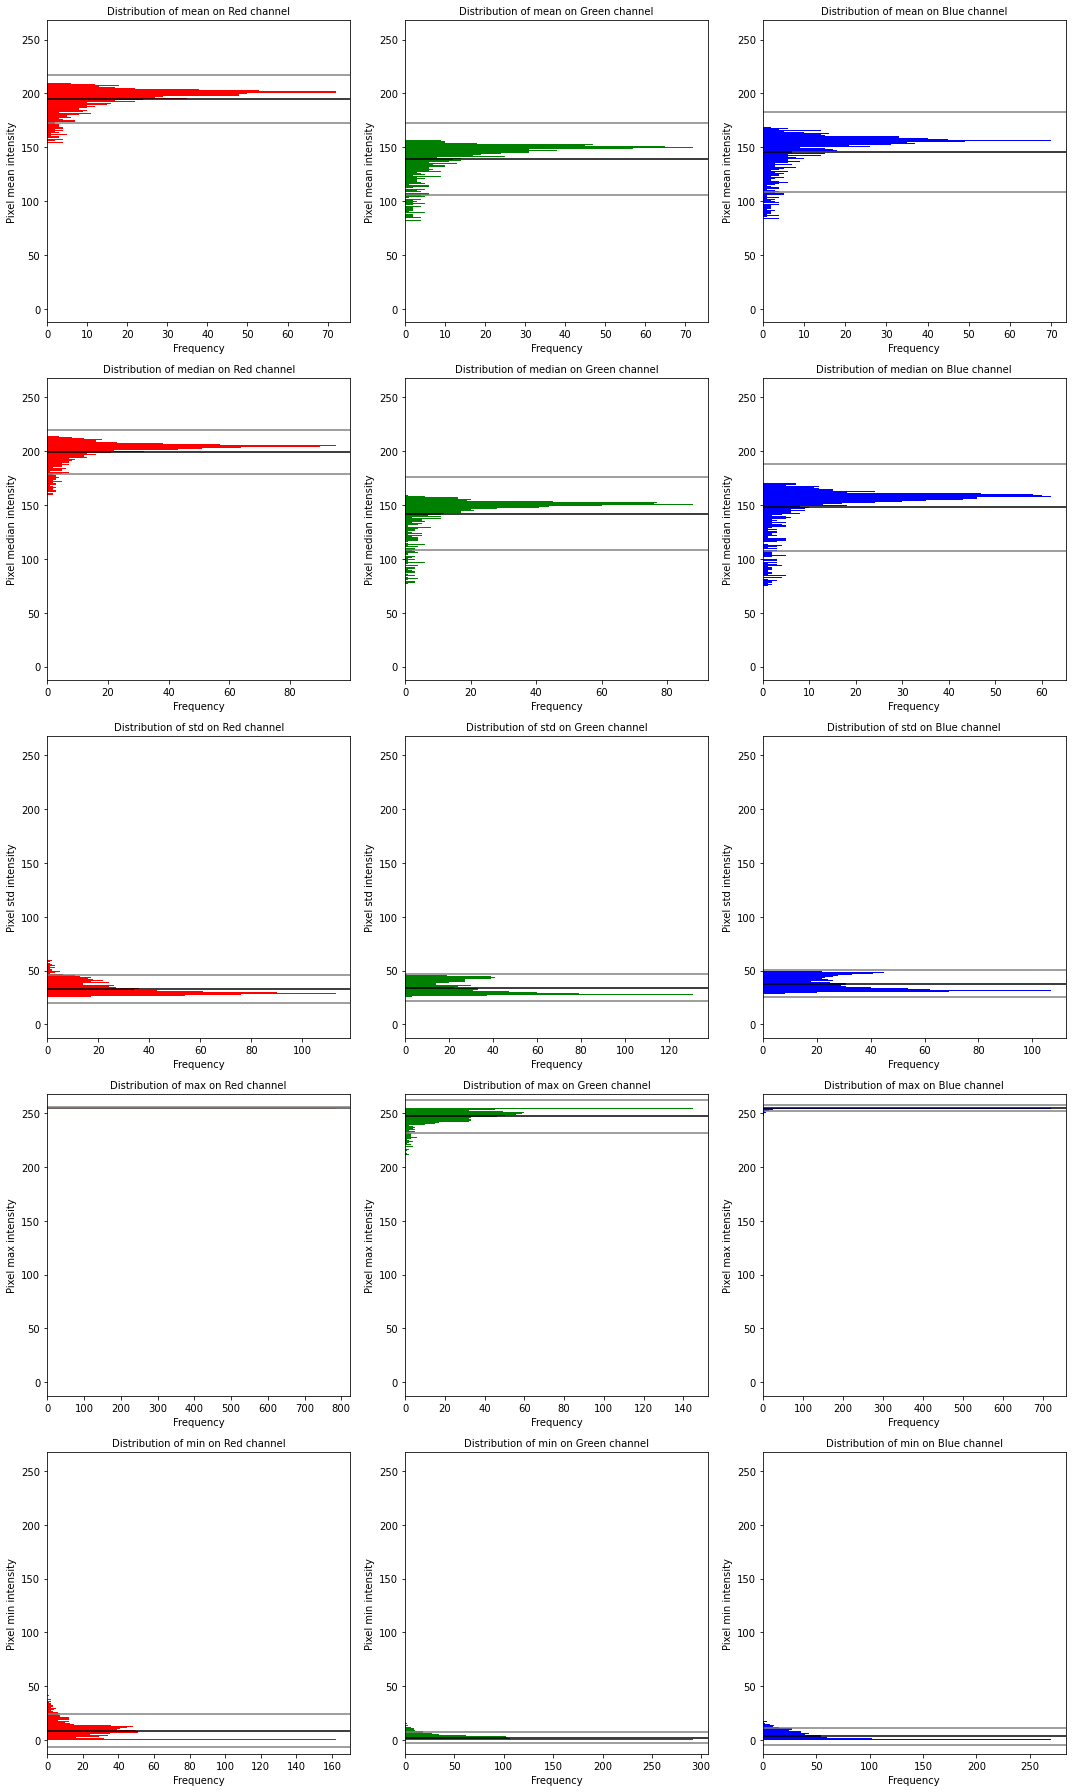

In [77]:
plot_scale = 5
std_span = 2

bins = np.arange(0,256,1)
fig, axs = plt.subplots(len(metrics),len(color_dfs))

for i, (col_name, col_df) in enumerate(color_dfs.items()):
    for j, (metric_name, metric) in enumerate(metrics.items()):
        ax = axs[j,i]
        
        dist = metric(col_df)
        ax.hist(dist, bins=bins, color=col_name, orientation="horizontal")
        
        ax.set_title("Distribution of {} on {} channel".format(metric_name,col_name),fontsize=plot_scale*2)
        ax.set_ylabel("Pixel {} intensity".format(metric_name),fontsize=plot_scale*2)
        ax.set_xlabel("Frequency",fontsize=plot_scale*2)
        
        ax.axhline(dist.mean(), color="black") # Mean line

        ax.axhline(dist.mean() - dist.std()*std_span, color="grey") # Std lines
        ax.axhline(dist.mean() + dist.std()*std_span, color="grey") 
        
fig.set_size_inches(plot_scale*len(color_dfs),plot_scale*len(metrics))
fig.tight_layout()